In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [3]:
dataset = pd.read_csv('diabetes.csv')

sample1 = dataset[dataset['Insulin'] == 0]['Glucose']
sample2 = dataset[dataset['Insulin'] != 0]['Glucose']

print("Количество записей в выборках: ", len(sample1), len(sample2))

print("\nВыборка возрастов с диабетом I типа")
print(sample1)

print("\nВыборка возрастов с диабетом II типа")
print(sample2)

Количество записей в выборках:  374 394

Выборка возрастов с диабетом I типа
0      148
1       85
2      183
5      116
7      115
      ... 
761    170
762     89
764    122
766    126
767     93
Name: Glucose, Length: 374, dtype: int64

Выборка возрастов с диабетом II типа
3       89
4      137
6       78
8      197
13     189
      ... 
753    181
755    128
760     88
763    101
765    121
Name: Glucose, Length: 394, dtype: int64



Выборочное среднее выборки 1: 119.4090909090909
Выборочное среднее выборки 2: 122.30456852791878
Выборочная дисперсия выборки 1: 1059.1271021203995
Выборочная дисперсия выборки 2: 985.7543302204828


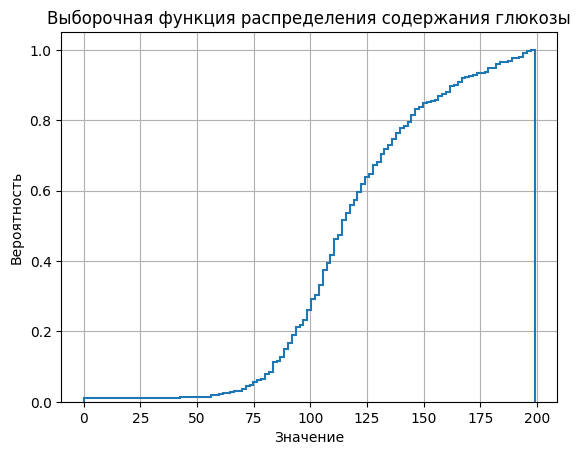

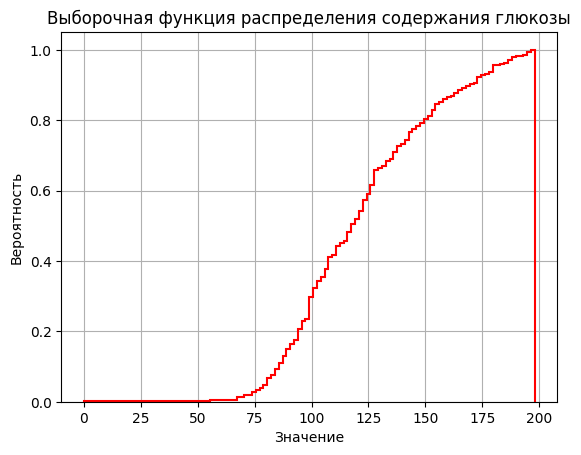

In [4]:
mean1 = sample1.mean()
mean2 = sample2.mean()

variance1 = sample1.var(ddof=1)
variance2 = sample2.var(ddof=1)

cdf1 = np.cumsum(sample1) / sample1.sum()
cdf2 = np.cumsum(sample2) / sample2.sum()

print("\nВыборочное среднее выборки 1:", mean1)
print("Выборочное среднее выборки 2:", mean2)
print("Выборочная дисперсия выборки 1:", variance1)
print("Выборочная дисперсия выборки 2:", variance2)

plt.hist(sample1, bins=len(sorted(set(sample1))), density=True, cumulative=True, histtype='step', linewidth=1.5)
plt.xlabel('Значение')
plt.ylabel('Вероятность')
plt.title('Выборочная функция распределения содержания глюкозы')
plt.grid(True)
plt.show()

plt.hist(sample2, bins=len(sorted(set(sample2))), density=True, cumulative=True, histtype='step', linewidth=1.5, color='red')
plt.xlabel('Значение')
plt.ylabel('Вероятность')
plt.title('Выборочная функция распределения содержания глюкозы')
plt.grid(True)
plt.show()

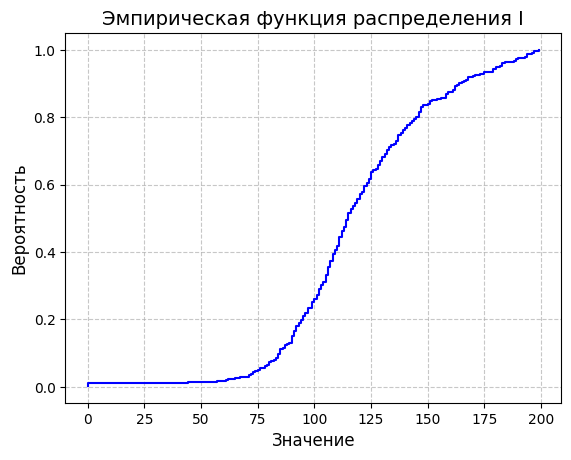

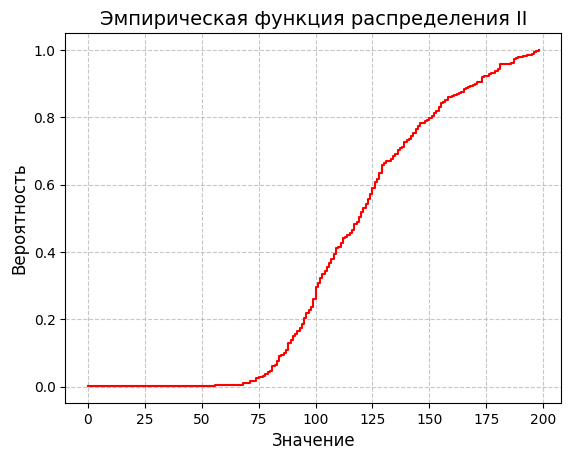

In [5]:
def plot_cdf(data, label=None, same_plot=False, color=None, ax=None):
    sorted_data = np.sort(data)
    
    cdf = np.arange(1, len(data) + 1) / len(data)
    
    if ax is None:
        ax = plt.gca()
    
    ax.step(sorted_data, cdf, where='post', label=label, color=color)
    ax.grid(True, linestyle='--', alpha=0.7)
    
    if not same_plot and ax == plt.gca():
        ax.set_xlabel('Значение', fontsize=12)
        ax.set_ylabel('Вероятность', fontsize=12)
        ax.set_title(f'Эмпирическая функция распределения {label}', fontsize=14)
        plt.show()

plot_cdf(sample1, label='I', same_plot=False, color='blue')
plot_cdf(sample2, label='II', same_plot=False, color='red')

In [6]:
n1 = len(sample1)
n2 = len(sample2)

print("Количество записей в выборках: ", n1, n2)
train_size1 = int(n1 * 0.75)
val_size1 = n1 - train_size1
train_size2 = int(n2 * 0.75)
val_size2 = n1 - train_size2

train_sample1 = sample1[:train_size1]
valid_sample1 = sample1[train_size1:]
train_sample2 = sample2[:train_size2]
valid_sample2 = sample2[train_size2:]

print("train1:", len(train_sample1), " valid1:", len(valid_sample1))
print("train2:",len(train_sample2), " valid2:", len(valid_sample2))

Количество записей в выборках:  374 394
train1: 280  valid1: 94
train2: 295  valid2: 99


In [7]:
import numpy as np
from scipy.optimize import minimize

def distr_func(samples, x):
    return np.sum(samples <= x) / len(samples)

def distr(alpha, beta, x):
    return 1 - np.exp(-alpha * x ** beta)

def squared_sum(params, samples):
    alpha, beta = params
    hyp_values = [distr(alpha, beta, x + 1e-9) for x in xs]
    target_values = [distr_func(samples, x) for x in xs]
    return np.sum((np.array(hyp_values) - np.array(target_values))**2)

scale = 10000.0
lst1 = [x/scale for x in train_sample1]
lst2 = [x/scale for x in train_sample2]

xs = np.arange(min(lst1), max(lst1), (max(lst1) - min(lst1)) / 100)
values = list(map(lambda x: distr_func(lst1, x), xs))

initial_guess = [1.17, 0.96]
result = minimize(squared_sum, initial_guess, args=(lst1,))
alpha1, beta1 = result.x
print("Оценка alpha1:", alpha1)
print("Оценка beta1:", beta1)

xs = np.arange(min(lst2), max(lst2), (max(lst2) - min(lst2)) / 100)
values = list(map(lambda x: distr_func(lst2, x), xs))

initial_guess = [1.17, 0.96]
result = minimize(squared_sum, initial_guess, args=(lst2,))
alpha2, beta2 = result.x
print("Оценка alpha2:", alpha2)
print("Оценка beta2:", beta2)

Оценка alpha1: 20457585.964988492
Оценка beta1: 3.872686733224786
Оценка alpha2: 10421005.636416525
Оценка beta2: 3.736906800580378


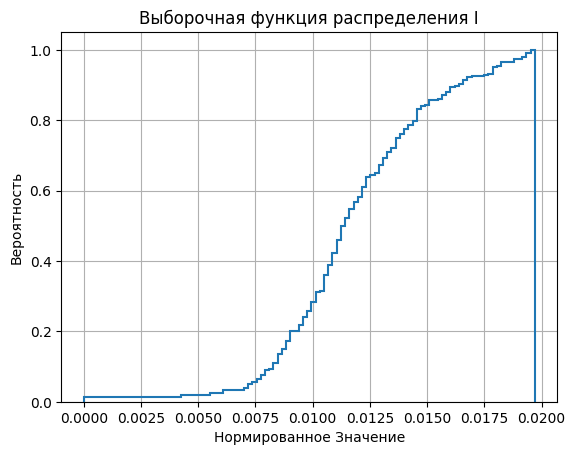

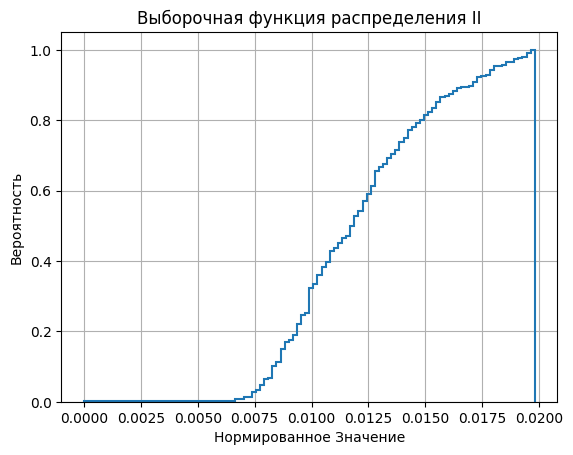

In [8]:
def F(x, a, b):
    return 1 - np.exp(-a * x**b)


unique_values1 = sorted(set(lst1))
unique_values2 = sorted(set(lst2))

plt.hist(lst1, bins=len(unique_values1), density=True, cumulative=True, histtype='step', linewidth=1.5)
plt.xlabel('Нормированное Значение')
plt.ylabel('Вероятность')
plt.title('Выборочная функция распределения I')
plt.grid(True)
plt.show()

plt.hist(lst2, bins=len(unique_values2), density=True, cumulative=True, histtype='step', linewidth=1.5)
plt.xlabel('Нормированное Значение')
plt.ylabel('Вероятность')
plt.title('Выборочная функция распределения II')
plt.grid(True)
plt.show()


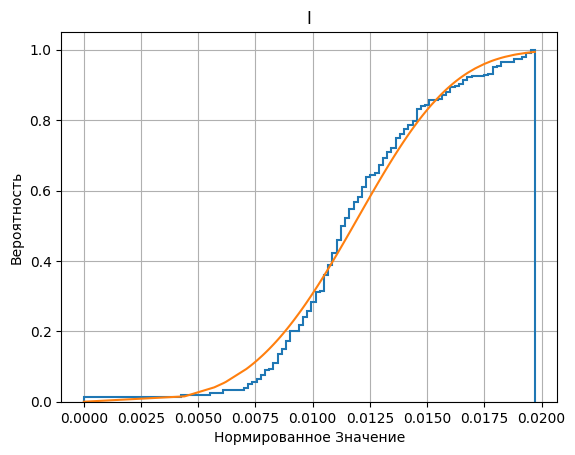

In [9]:
res1 = [F(x, alpha1, beta1) for x in unique_values1]
plt.hist(lst1, bins=len(unique_values1), density=True, cumulative=True, histtype='step', linewidth=1.5)
plt.plot(unique_values1, res1)
plt.xlabel('Нормированное Значение')
plt.ylabel('Вероятность')
plt.title('I')
plt.grid(True)
plt.show()

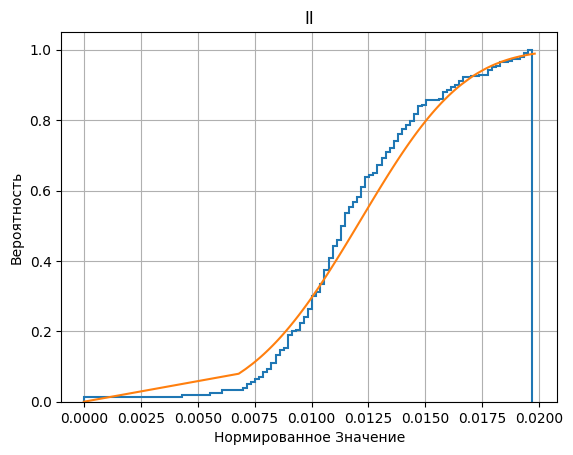

In [10]:
res2 = [F(x, alpha2, beta2) for x in unique_values2]
plt.hist(lst1, bins=len(unique_values2), density=True, cumulative=True, histtype='step', linewidth=1.5)
plt.plot(unique_values2, res2)
plt.xlabel('Нормированное Значение')
plt.ylabel('Вероятность')
plt.title('II')
plt.grid(True)
plt.show()

C:\Users\Golum\AppData\Local\Temp\ipykernel_10148\3120775663.py:8: RuntimeWarning: overflow encountered in exp
  return 1 - np.exp(-alpha * x ** beta)
c:\Users\Golum\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_numdiff.py:592: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0
C:\Users\Golum\AppData\Local\Temp\ipykernel_10148\3120775663.py:8: RuntimeWarning: overflow encountered in scalar power
  return 1 - np.exp(-alpha * x ** beta)
c:\Users\Golum\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_numdiff.py:592: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0
C:\Users\Golum\AppData\Local\Temp\ipykernel_10148\3120775663.py:8: RuntimeWarning: overflow encountered in exp
  return 1 - np.exp(-alpha * x ** beta)


Оценка alpha1: 0.18391002673478607
Оценка beta1: 0.26204388047038474
Оценка alpha2: 0.18098138722493962
Оценка beta2: 0.25753872361025665


C:\Users\Golum\AppData\Local\Temp\ipykernel_10148\3120775663.py:8: RuntimeWarning: overflow encountered in exp
  return 1 - np.exp(-alpha * x ** beta)
c:\Users\Golum\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_numdiff.py:592: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0
C:\Users\Golum\AppData\Local\Temp\ipykernel_10148\3120775663.py:8: RuntimeWarning: overflow encountered in scalar power
  return 1 - np.exp(-alpha * x ** beta)
c:\Users\Golum\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_numdiff.py:592: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0
C:\Users\Golum\AppData\Local\Temp\ipykernel_10148\3120775663.py:8: RuntimeWarning: overflow encountered in exp
  return 1 - np.exp(-alpha * x ** beta)


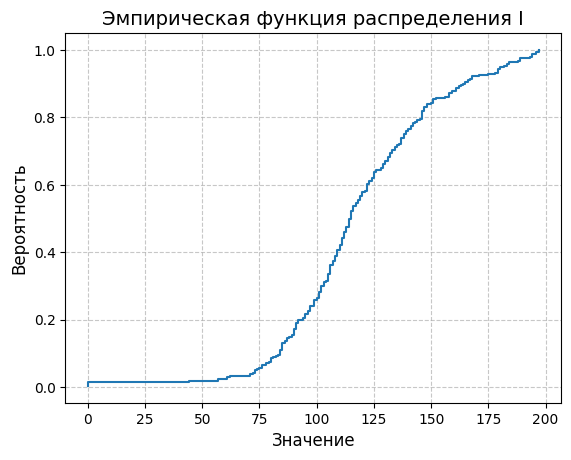

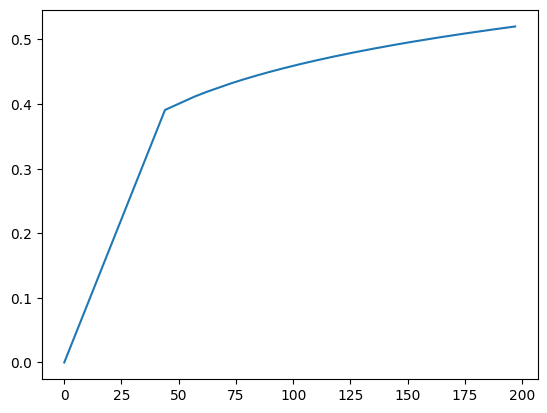

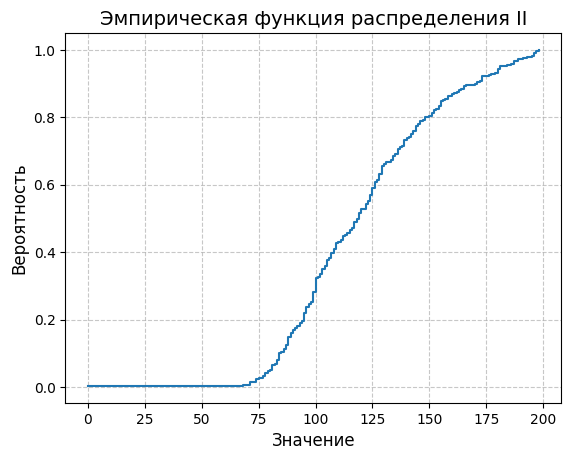

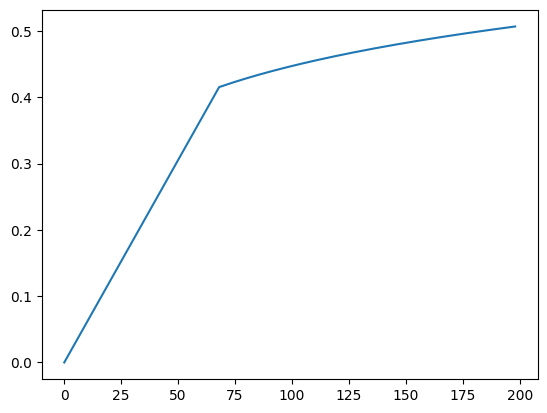

In [11]:
samples = train_sample1

xs = np.arange(min(samples), max(samples), (max(samples) - min(samples)) / 100)
values = list(map(lambda x: distr_func(samples, x), xs))

initial_guess = [1, 1]
result = minimize(squared_sum, initial_guess, args=(samples,))
alpha11, beta11 = result.x
print("Оценка alpha1:", alpha11)
print("Оценка beta1:", beta11)

samples = train_sample2
xs = np.arange(min(samples), max(samples), (max(samples) - min(samples)) / 100)
values = list(map(lambda x: distr_func(samples, x), xs))

initial_guess = [1, 1]
result = minimize(squared_sum, initial_guess, args=(samples,))
alpha22, beta22 = result.x
print("Оценка alpha2:", alpha22)
print("Оценка beta2:", beta22)


x = np.sort(train_sample1)
def F1(x):
    return 1 - np.exp(-alpha11*(x**beta11))

plot_cdf(train_sample1, 'I')
plt.plot(x, F1(x))
plt.show()

x = np.sort(train_sample2)

def F2(x):
    return 1 - np.exp(-alpha22*(x**beta22))

plot_cdf(train_sample2, 'II')
plt.plot(x, F2(x))
plt.show()

In [12]:
from scipy.stats import kstest

def kolmogorov_smirnov_test(data, cdf):
    ks_statistic, p_value = kstest(data, cdf)
    if p_value < 0.05:
        print("Не подходит")
    else:
        print("Подходит")
    return ks_statistic, p_value

In [281]:
kolmogorov_smirnov_test(lst1, res1)

Не подходит


(0.9813084112149533, 4.807499522641502e-90)

In [282]:
kolmogorov_smirnov_test(lst2, res2)

Не подходит


(0.990909090909091, 3.956234724091118e-98)

In [283]:
lst1_valid = [x/scale for x in valid_sample1]
resF1 = [F(x, alpha1, beta1) for x in sorted(set(lst1_valid))]
kolmogorov_smirnov_test(lst1_valid, resF1)

Не подходит


(1.0, 9.160512824448608e-45)

In [284]:
lst2_valid = [x/scale for x in valid_sample2]
resF2 = [F(x, alpha2, beta2) for x in sorted(set(lst2_valid))]
kolmogorov_smirnov_test(lst2_valid, resF2)

Не подходит


(1.0, 7.560700357713067e-48)

In [285]:
x = np.sort(train_sample1)
kolmogorov_smirnov_test(train_sample1, F1(x))

Не подходит


(0.9857142857142858, 6.3746778838107944e-158)

In [286]:
x = np.sort(train_sample2)
kolmogorov_smirnov_test(train_sample2, F2(x))

Не подходит


(0.9966101694915255, 8.868589085396528e-174)

In [287]:
x = np.sort(valid_sample1)
kolmogorov_smirnov_test(valid_sample1, F1(x))

Не подходит


(1.0, 8.772173050673867e-56)

In [288]:
x = np.sort(valid_sample2)
kolmogorov_smirnov_test(valid_sample2, F2(x))

Не подходит


(1.0, 8.790867558934011e-59)

In [13]:
def kolmogorov(y1, y2, sample_len=10//4*3):
    eps = 0.01
    Dn = max(abs(y1[i] - y2[i]) for i in range(len(y1)))
    betta = 0.01
    Db = 1 / np.sqrt(sample_len) * np.sqrt(-0.5*np.log(betta))
    return (Dn - Db) <= eps


print("Критерий Колмогорова для выборки 1:", kolmogorov(list(set(lst1)), res1))
print("Критерий Колмогорова для выборки 2:", kolmogorov(list(set(lst2)), res2))

Критерий Колмогорова для выборки 1: False
Критерий Колмогорова для выборки 2: False


In [ ]:
def kolmogorov(y1, y2, sample_len):
    eps = 0.01
    Dn = max(abs(y1[i] - y2[i]) for i in range(len(y1)))
    betta = 0.01
    Db = 1 / np.sqrt(sample_len) * np.sqrt(-0.5*np.log(betta))
    print(Dn, Db)
    return (Dn - Db) <= eps


print("Критерий Колмогорова для выборки 1:", kolmogorov(list(set(lst1)), res1, len(res1)))
print("Критерий Колмогорова для выборки 2:", kolmogorov(list(set(lst2)), res2, len(res2)))

0.9836610451234331 0.14669521754444362
Критерий Колмогорова для выборки 1: False
0.9787985261241797 0.1446809999775068
Критерий Колмогорова для выборки 2: False


0.9665594216455401
alpha^:  1.1730388182040812  beta^: 0.9665594216455401


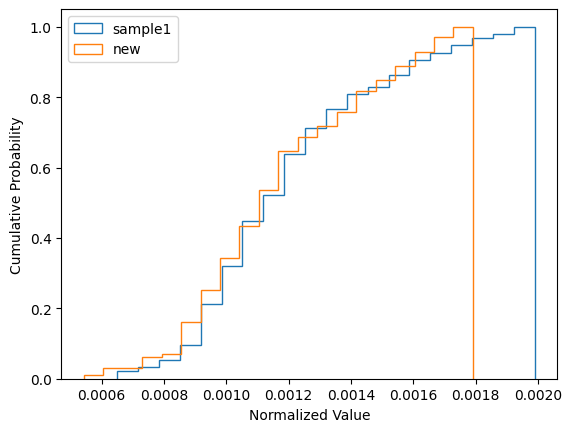

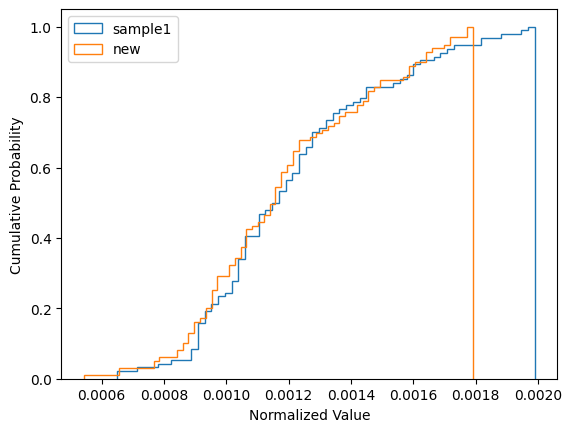

In [15]:
s1 = valid_sample1.var(ddof=1)
s2 = valid_sample2.var(ddof=1)

betta = (s1/s2)**(1/2)
print(betta)

# betta = (s1**2/s2**2)**(1/2)
# print(betta)

L1 = np.mean(np.log(valid_sample1))
L2 = np.mean(np.log(valid_sample1))
alphaa = np.exp(L1 - betta*L2)

print("alpha^: ", alphaa, " beta^:", betta)

sample2_new = [alphaa*i**betta for i in valid_sample2]


scale = 100000.0
smpl1 = [x/scale for x in valid_sample1]
smpl2 = [x/scale for x in valid_sample2]

samples = smpl1
xs = np.arange(min(samples), max(samples), (max(samples) - min(samples)) / 100)
values = list(map(lambda x: distr_func(samples, x), xs))
result1 = minimize(squared_sum, [0, 0], args=(samples,))

samples = smpl2
xs = np.arange(min(samples), max(samples), (max(samples) - min(samples)) / 100)
values = list(map(lambda x: distr_func(samples, x), xs))
result2 = minimize(squared_sum, [0, 0], args=(samples,))

betta = result2.x[1] / result1.x[1]
alphaa = (result2.x[0] / result1.x[0]) ** (1 / result1.x[1])

new_s2 = [alphaa*i**betta for i in smpl2]
plt.figure()
plt.hist(smpl1, bins=20, density=True, histtype='step', cumulative=True)
plt.hist(new_s2, bins=20, density=True, histtype='step', cumulative=True)
plt.legend(['sample1', 'new'])
plt.xlabel('Normalized Value')
plt.ylabel('Cumulative Probability')
plt.show()


plt.figure()
plt.hist(smpl1, bins=len(sorted(set(smpl1))), density=True, histtype='step', cumulative=True)
plt.hist(new_s2, bins=len(sorted(set(new_s2))), density=True, histtype='step', cumulative=True)
plt.legend(['sample1', 'new'])
plt.xlabel('Normalized Value')
plt.ylabel('Cumulative Probability')
plt.show()

In [84]:
print(alpha1/alpha2)

0.9409057927817662


In [85]:
print(beta1/beta2)

0.9924864164158729


In [ ]:
s1 = valid_sample1.var(ddof=1)
s2 = valid_sample2.var(ddof=1)

betta = (s1/s2)**(1/2)

L1 = np.mean(np.log(valid_sample1))
L2 = np.mean(np.log(valid_sample1))
alphaa = np.exp(L1 - betta*L2)

print("alpha^: ", alphaa, " beta^:", betta)

alpha^:  1.1730388182040812  beta^: 0.9665594216455401


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

dataset = pd.read_csv('diabetes.csv')

sample1 = dataset[dataset['Insulin'] == 0][['Glucose', 'Insulin']]
sample2 = dataset[dataset['Insulin'] != 0][['Glucose', 'Insulin']]

y1 = dataset[dataset['Insulin'] == 0]['Outcome']
y2 = dataset[dataset['Insulin'] != 0]['Outcome']

imputer = SimpleImputer(strategy='median')
sample1 = pd.DataFrame(imputer.fit_transform(sample1), columns=sample1.columns)
sample2 = pd.DataFrame(imputer.fit_transform(sample2), columns=sample2.columns)

X1_train, X1_test, y1_train, y1_test = train_test_split(sample1, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(sample2, y2, test_size=0.2, random_state=42)

scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

model1 = LogisticRegression()
model1.fit(X1_train, y1_train)
model2 = LogisticRegression()
model2.fit(X2_train, y2_train)

y1_pred = model1.predict(X1_test)
y2_pred = model2.predict(X2_test)

print("Accuracy for sample 1:", accuracy_score(y1_test, y1_pred))
print("Classification Report for sample 1:\n", classification_report(y1_test, y1_pred))
print("Accuracy for sample 2:", accuracy_score(y2_test, y2_pred))
print("Classification Report for sample 2:\n", classification_report(y2_test, y2_pred))

Accuracy for sample 1: 0.7066666666666667
Classification Report for sample 1:
               precision    recall  f1-score   support

           0       0.72      0.87      0.79        47
           1       0.67      0.43      0.52        28

    accuracy                           0.71        75
   macro avg       0.69      0.65      0.66        75
weighted avg       0.70      0.71      0.69        75

Accuracy for sample 2: 0.7848101265822784
Classification Report for sample 2:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85        54
           1       0.68      0.60      0.64        25

    accuracy                           0.78        79
   macro avg       0.75      0.74      0.74        79
weighted avg       0.78      0.78      0.78        79

